In [11]:
import sklearn
from preamble import *
%matplotlib inline

from config import seed

## 1.7. 鸢尾花分类
分步骤执行，仔细观察系统的功能和数据的内涵，更加深入的理解对于后面的学习会有帮助
### 1.7.1. 导入鸢尾花的数据

In [9]:
iris_dataset = sklearn.datasets.load_iris()
print('Keys of iris_database(数据库关键字): \n{}'.format(iris_dataset.keys()))
print(iris_dataset['DESCR'][:193] + '\n...')
print('Target names(目标名称): {}'.format(iris_dataset['target_names']))
print('Feature names(特征名称):\n{}'.format(iris_dataset['feature_names']))
print('Type of data(数据类型): {}'.format(type(iris_dataset['data'])))
print('Shape of data(数据形状): {}'.format(iris_dataset['data'].shape))
print('First five rows of data(前五行数据):\n{}'.format(iris_dataset['data'][:5]))
print('Type of target(目标类型): {}'.format(type(iris_dataset['target'])))
print('Shape of target(目标形状): {}'.format(iris_dataset['target'].shape))
print('Target(目标):\n{}'.format(iris_dataset['target']))


Keys of iris_database: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...
Target names: ['setosa' 'versicolor' 'virginica']
Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)
First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

### 1.7.2. 准备数据

In [13]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
        iris_dataset['data'], iris_dataset['target'], random_state=seed)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [14]:
### 1.7.3. 观察数据(ToDo: 对数据散点图的认识还需要加强）

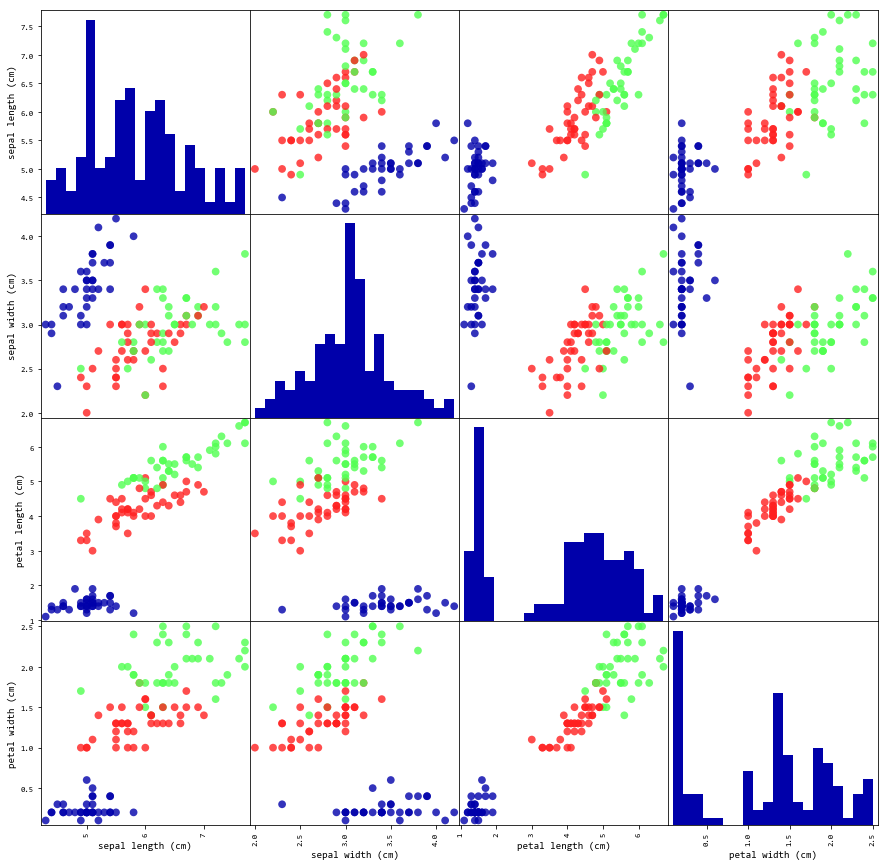

In [16]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(
        iris_dataframe, c=y_train, figsize=(15, 15),
        marker='o', hist_kwds={'bins': 20}, s=60, alpha=0.8, cmap=mglearn.cm3)

### 1.7.4. K近邻算法

In [18]:
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train, y_train)  # 模型训练

KNeighborsClassifier(n_neighbors=1)

### 1.7.5. 做出预测

In [20]:
    X_new = np.array([[5, 2.9, 1, 0.2]])
    print('X_new.shape(预测数据的形状): {}'.format(X_new.shape))
    prediction = model.predict(X_new)
    print('Prediction(预测的结果): {}'.format(prediction))
    print('Predicted target name(预测结果的目标名称): {}'.format(iris_dataset['target_names'][prediction]))

X_new.shape(预测数据的形状): (1, 4)
Prediction(预测的结果): [0]
Predicted target name(预测结果的目标名称): ['setosa']


### 1.7.6. 模型评估：精确度（accuracy）衡量模型的优劣

In [21]:
    y_pred = model.predict(X_test)
    # 手工计算预测的结果和精确度
    print('Test set predictions:\n{}'.format(y_pred))
    print('Test set score: {:.2f}'.format(np.mean(y_pred == y_test)))
    print('Test set score: {:.2f}'.format(np.count_nonzero(y_pred == y_test) / len(y_test)))
    # 模型评估预测的精确度
    print('Test set score: {:.2f}'.format(model.score(X_test, y_test)))

Test set predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1 0]
Test set score: 1.00
Test set score: 1.00
Test set score: 1.00
